In [10]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder,StandardScaler
from sklearn.cluster import KMeans
import matplotlib.pylab as plt

data=pd.read_csv('cities_r2.csv')
data.head()

,name_of_city,state_code,state_name,dist_code,population_total,population_male,population_female,0-6_population_total,0-6_population_male,0-6_population_female,...,literates_female,sex_ratio,child_sex_ratio,effective_literacy_rate_total,effective_literacy_rate_male,effective_literacy_rate_female,location,total_graduates,male_graduates,female_graduates
0,Abohar,3,PUNJAB,9,145238,76840,68398,15870,8587,7283,...,44972,890,848,79.86,85.49,73.59,"30.1452928,74.1993043",16287,8612,7675
1,Achalpur,27,MAHARASHTRA,7,112293,58256,54037,11810,6186,5624,...,43086,928,909,91.99,94.77,89.00,"21.257584,77.5086754",8863,5269,3594
2,Adilabad,28,ANDHRA PRADESH,1,117388,59232,58156,13103,6731,6372,...,37660,982,947,80.51,88.18,72.73,"19.0809075,79.560344",10565,6797,3768
3,Adityapur,20,JHARKHAND,24,173988,91495,82493,23042,12063,10979,...,54515,902,910,83.46,89.98,76.23,"22.7834741,86.1576889",19225,12189,7036
4,Adoni,28,ANDHRA PRADESH,21,166537,82743,83794,18406,9355,9051,...,45089,1013,968,68.38,76.58,60.33,"15.6322227,77.2728368",11902,7871,4031


In [12]:
print("Missing values : \n",data.isnull().sum())
data=data.dropna()

Missing values : 
 name_of_city                      0
state_code                        0
state_name                        0
dist_code                         0
population_total                  0
population_male                   0
population_female                 0
0-6_population_total              0
0-6_population_male               0
0-6_population_female             0
literates_total                   0
literates_male                    0
literates_female                  0
sex_ratio                         0
child_sex_ratio                   0
effective_literacy_rate_total     0
effective_literacy_rate_male      0
effective_literacy_rate_female    0
location                          0
total_graduates                   0
male_graduates                    0
female_graduates                  0
dtype: int64


In [14]:
if 'name_of_city' in data.columns:
    le=LabelEncoder()
    data['name_of_city']=le.fit_transform(data['name_of_city'])


x=data[['total_graduates']]
scaler=StandardScaler()
x_scaled=scaler.fit_transform(x)

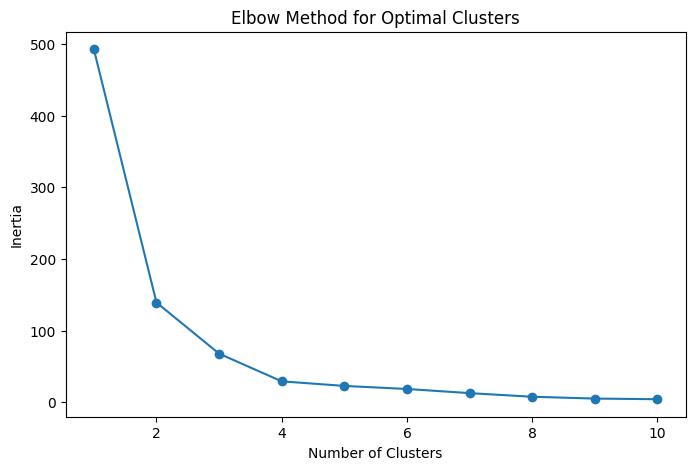

In [16]:
# Step 4: Determine Optimal Clusters using the Elbow Method

inertia=[]
for n in range(1,11):
    kmeans=KMeans(n_clusters=n,random_state=42)
    kmeans.fit(x_scaled)
    inertia.append(kmeans.inertia_)

plt.figure(figsize=(8,5))
plt.plot(range(1,11),inertia,marker='o')
plt.title("Elbow Method for Optimal Clusters")
plt.xlabel('Number of Clusters')
plt.ylabel("Inertia")
plt.show()

In [18]:
optimal_clusters=3
kmeans=KMeans(n_clusters=optimal_clusters,random_state=42)
data['Cluster']=kmeans.fit_predict(x_scaled)

print("cluster center : \n",kmeans.cluster_centers_)
print("\nData grouped by clusters : \n",data.groupby('Cluster')['total_graduates'].mean())

cluster center : 
 [[ 9.16752333]
 [-0.14443294]
 [ 2.46769138]]

Data grouped by clusters : 
 Cluster
0    1.694705e+06
1    4.054554e+04
2    5.045587e+05
Name: total_graduates, dtype: float64


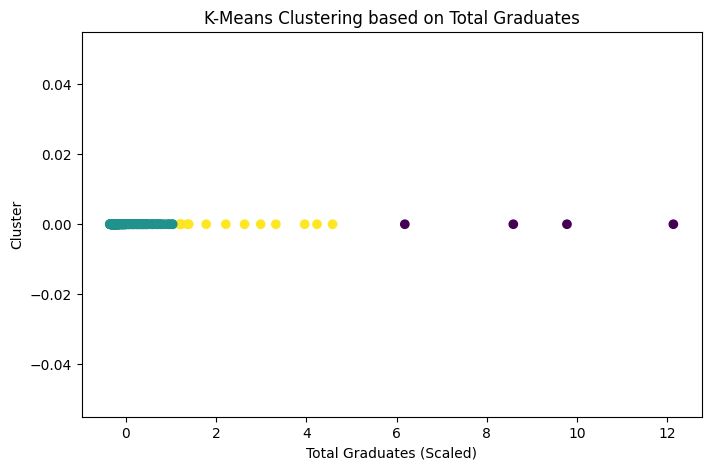

In [21]:
plt.figure(figsize=(8, 5))
plt.scatter(x_scaled, [0]*len(x_scaled), c=data['Cluster'], cmap='viridis')
plt.title('K-Means Clustering based on Total Graduates')
plt.xlabel('Total Graduates (Scaled)')
plt.ylabel('Cluster')
plt.show()